## Flowers are Pretty

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

sklearn datasets are dictionaries containing the data as well as names of things

In [2]:
iris.keys()

dict_keys(['feature_names', 'DESCR', 'target_names', 'data', 'target'])

In [3]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

data stored in a matrix of shape (n_samples, n_features)

In [6]:
iris.data[:5,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [3]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("talk")
#sns.set_style('white')

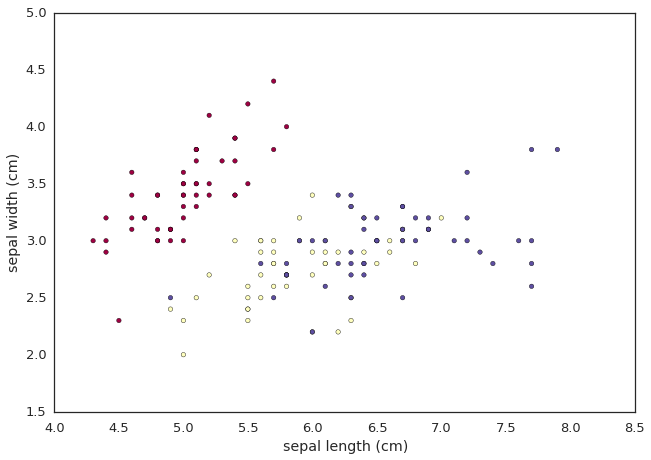

In [22]:
cm = plt.cm.Spectral
ax = df.plot(x=0, y=1, kind='scatter', c='target', colormap=cm, colorbar=False)
ax.grid(False)

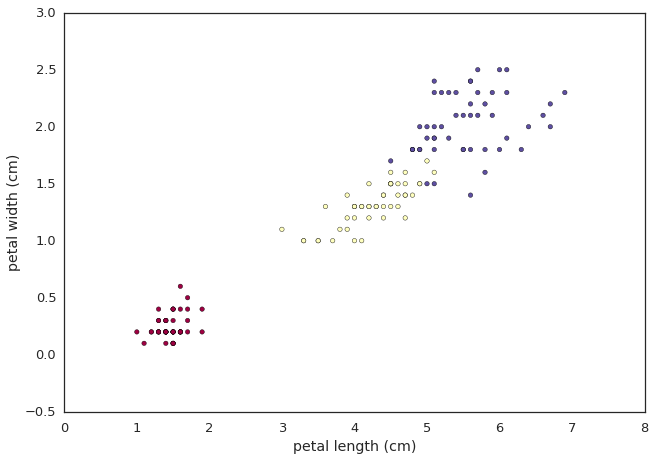

In [23]:
cm = plt.cm.Spectral
ax = df.plot(x=2, y=3, kind='scatter', c='target', colormap=cm, colorbar=False)
ax.grid(False)

## Building a classifier

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression()

Train the classifier using the petal length and width.

In [44]:
X = df.iloc[:, [2, 3]]
y = df.target
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [45]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

The classifier is now trained on data! We can use it to do stuff like predicting iris types based on features we supply.

In [46]:
clf.predict(X.head())

array([0, 0, 0, 0, 0])

How many did we get right?

In [47]:
clf.score(X, y)

0.87333333333333329

Let’s make a plot
http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

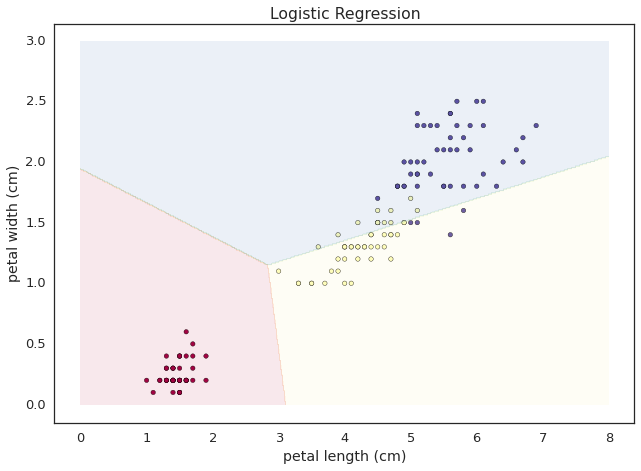

In [48]:
import numpy as np

def plot_predictions(clf):
    # make a grid of predictions to color plot background
    h = 0.01
    x_range = np.arange(0, 8, h)
    y_range = np.arange(0, 3, h)
    xx, yy = np.meshgrid(x_range, y_range)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape[0],xx.shape[1])

    ax = df.plot(x=2, y=3, kind='scatter', c='target', cmap=cm, colorbar=False)
    ax.contourf(x_range, y_range, Z, cmap=cm, alpha=.1)
    ax.grid(False)
    plt.title('Logistic Regression')
    plt.show()
    
plot_predictions(clf)

Note that we're scoring based on the training data. Not cool. We should be scoring using a test set that was set aside and not touched at all during the training process.

In [49]:
from sklearn.cross_validation import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [63]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

100 100 50 50


In [64]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [65]:
X_train[:5,:]

array([[ 4.5,  1.7],
       [ 1.3,  0.3],
       [ 4.9,  1.5],
       [ 1.4,  0.2],
       [ 1.5,  0.2]])

In [66]:
y_train

array([2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1,
       1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 2,
       0, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 1, 0])

Internally, sklearn uses numpy arrays, not pandas dataframes. It will (usually) accept dataframes but will convert them to arrays for calculations.

Note also that the train/test split was random, so we don't have to worry about our dataframe being ordered by iris type. For unbalanced categories there are functions that preserve the category ratios in the train/test tests.

In [67]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.81999999999999995

In [68]:
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.755555555556
0.844444444444
0.844444444444
0.822222222222
0.888888888889
0.822222222222
0.911111111111
0.822222222222
0.844444444444
0.755555555556


In [90]:
def mean_score(clf, X, y, test_size=0.33, N=10):
    scores = []
    for _ in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    return(np.mean(scores))

In [95]:
mean_score(LogisticRegression(), X, y, N=100)

0.83666666666666667

Let's use all four features rather than just two.

In [118]:
X4 = df.iloc[:, [0, 1, 2, 3]]
X4.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [119]:
mean_score(LogisticRegression(), X4, y, N=100)

0.94022222222222229

In [116]:
for C in range(1, 100):
    print(C, mean_score(LogisticRegression(C=C), X, y, N=100))

1 0.945111111111
2 0.950222222222
3 0.956222222222
4 0.958888888889
5 0.958444444444
6 0.962
7 0.962
8 0.962222222222
9 0.959555555556
10 0.957111111111
11 0.956222222222
12 0.964444444444
13 0.961333333333
14 0.960222222222
15 0.954222222222
16 0.956888888889
17 0.965777777778
18 0.967333333333
19 0.960888888889
20 0.968222222222
21 0.96
22 0.963555555556
23 0.958666666667
24 0.961555555556
25 0.960888888889
26 0.958888888889
27 0.962
28 0.964666666667
29 0.968222222222
30 0.964
31 0.963777777778
32 0.959333333333
33 0.963333333333
34 0.961333333333
35 0.960222222222
36 0.966222222222
37 0.965555555556
38 0.969777777778
39 0.965333333333
40 0.964
41 0.961555555556
42 0.961777777778
43 0.959111111111
44 0.968444444444
45 0.965111111111
46 0.966444444444
47 0.955333333333
48 0.964666666667
49 0.96
50 0.966666666667
51 0.960222222222
52 0.963555555556
53 0.960888888889
54 0.964888888889
55 0.958444444444
56 0.965111111111
57 0.964444444444
58 0.962888888889
59 0.960888888889
60 0.9653333

KeyboardInterrupt: 